In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans


sns.set()

In [2]:
from sklearn.datasets import load_digits

dataset = load_digits()
X = dataset.data
y = dataset.target

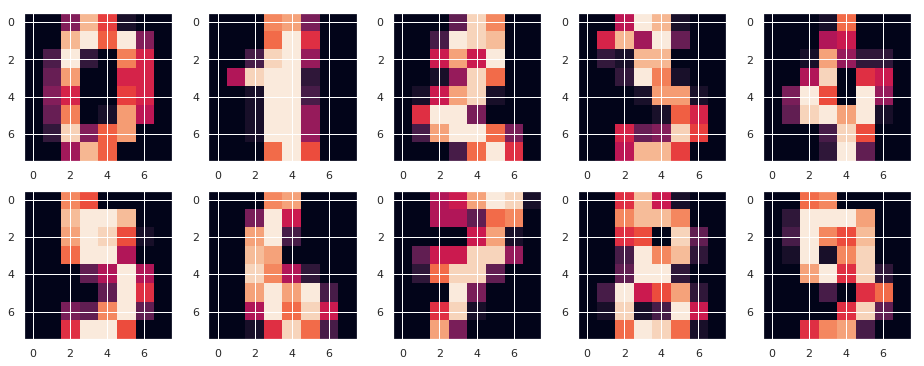

In [3]:
plt.figure(figsize=(16,6))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]))

In [4]:
n_components = 0
while True: 
    n_components+=1
    pca = PCA(n_components=n_components,random_state=42)
    pca.fit(X)
    sum_pca_explained_variance_ratio = pca.explained_variance_ratio_.sum()
    if sum_pca_explained_variance_ratio >= 0.95:
        break
print(f'Ex 1: {n_components}')

Ex 1: 29


In [5]:
pca = PCA(n_components=n_components,random_state=42)
pca.fit(X)
X_pca = pca.transform(X)
scaler = StandardScaler()
# X_pca = scaler.fit_transform(X)

In [6]:
mean_value = np.round(X_pca[y==0].mean(),4)
print(f'Ex 2: {mean_value}')

Ex 2: 0.5707


In [7]:
X_scaler = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=10,random_state=42)
kmeans.fit(X_scaler)
import collections
collections.Counter(kmeans.labels_[y==1])

Counter({3: 96, 9: 58, 6: 27, 4: 1})

In [11]:
print(f'Ex 3: 3')

Ex 3: 3


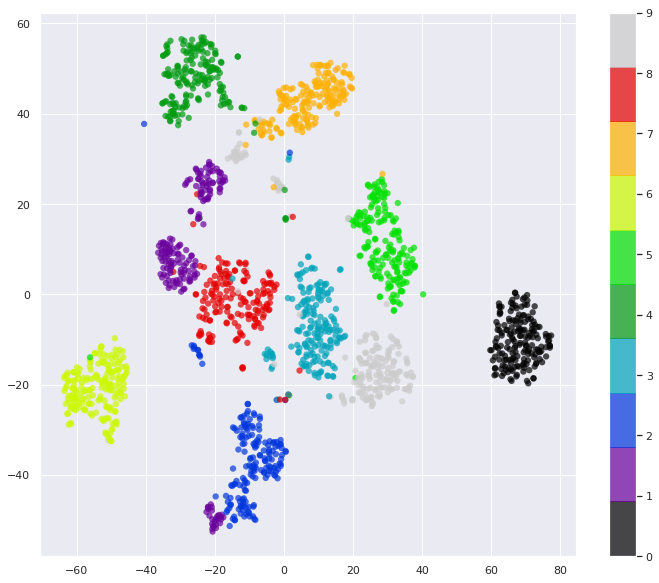

In [9]:
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X_scaler)
plt.figure(figsize=(12,10))
plt.scatter(x=X_tsne[:,0],y=X_tsne[:,1],c=y,edgecolors='none',alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.show()

In [10]:
x = X_tsne[:,0]
A = np.round(x[y==0].min(),2)
B = np.round(x[y==0].max(),2)
print(f'Ex4: ({A}; {B})')

Ex4: (59.70000076293945; 77.30999755859375)
